In [1]:
# Import the important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from yaml import safe_load
import os
from tqdm import tqdm
import pickle

In [2]:
# Load the data from the pickle file
df = pickle.load(open("data_level1.pkl", "rb"))
df

,innings,info.dates,info.match_type,info.outcome.winner,info.overs,info.player_of_match,info.teams,info.toss.decision,info.toss.winner,info.umpires,info.venue,match_id,info.city
0,"[{'1st innings': {'team': 'Australia', 'delive...",[2017-02-17],T20,Sri Lanka,20,[DAS Gunaratne],"[Australia, Sri Lanka]",field,Sri Lanka,"[MD Martell, P Wilson]",Melbourne Cricket Ground,1,NaN
0,"[{'1st innings': {'team': 'Australia', 'delive...",[2017-02-19],T20,Sri Lanka,20,[DAS Gunaratne],"[Australia, Sri Lanka]",field,Sri Lanka,"[SD Fry, SJ Nogajski]","Simonds Stadium, South Geelong",2,Victoria
0,"[{'1st innings': {'team': 'Australia', 'delive...",[2017-02-22],T20,Australia,20,[A Zampa],"[Australia, Sri Lanka]",field,Sri Lanka,"[MD Martell, P Wilson]",Adelaide Oval,3,NaN
0,"[{'1st innings': {'team': 'Hong Kong', 'delive...",[2016-09-05],T20,Hong Kong,20,NaN,"[Ireland, Hong Kong]",bat,Hong Kong,"[R Black, AJ Neill]","Bready Cricket Club, Magheramason",4,Londonderry
0,"[{'1st innings': {'team': 'Zimbabwe', 'deliver...",[2016-06-18],T20,Zimbabwe,20,[E Chigumbura],"[Zimbabwe, India]",field,India,"[TJ Matibiri, RB Tiffin]",Harare Sports Club,5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,"[{'1st innings': {'team': 'Sri Lanka', 'delive...",[2016-03-04],T20,Pakistan,20,[Umar Akmal],"[Pakistan, Sri Lanka]",field,Pakistan,"[AK Chaudhary, Enamul Haque]",Shere Bangla National Stadium,1223,Mirpur
0,"[{'1st innings': {'team': 'Bangladesh', 'deliv...",[2016-03-06],T20,India,20,[S Dhawan],"[Bangladesh, India]",field,India,"[RSA Palliyaguruge, Shozab Raza]",Shere Bangla National Stadium,1224,Mirpur
0,"[{'1st innings': {'team': 'Netherlands', 'deli...",[2016-02-03],T20,Netherlands,20,[Mudassar Bukhari],"[United Arab Emirates, Netherlands]",field,United Arab Emirates,"[CK Nandan, Sarika Prasad]",ICC Academy,1225,Dubai
0,"[{'1st innings': {'team': 'Australia', 'delive...",[2016-09-06],T20,Australia,20,[GJ Maxwell],"[Sri Lanka, Australia]",field,Sri Lanka,"[REJ Martinesz, RR Wimalasiri]",Pallekele International Cricket Stadium,1226,NaN


In [3]:
#Extract more data for the runs at each ball
matches = pickle.load(open('data_level1.pkl','rb'))
matches.iloc[0]['innings'][0]['1st innings']['deliveries']

[{0.1: {'batsman': 'AJ Finch',
   'bowler': 'SL Malinga',
   'non_striker': 'M Klinger',
   'runs': {'batsman': 0, 'extras': 0, 'total': 0}}},
 {0.2: {'batsman': 'AJ Finch',
   'bowler': 'SL Malinga',
   'non_striker': 'M Klinger',
   'runs': {'batsman': 0, 'extras': 0, 'total': 0}}},
 {0.3: {'batsman': 'AJ Finch',
   'bowler': 'SL Malinga',
   'non_striker': 'M Klinger',
   'runs': {'batsman': 1, 'extras': 0, 'total': 1}}},
 {0.4: {'batsman': 'M Klinger',
   'bowler': 'SL Malinga',
   'non_striker': 'AJ Finch',
   'runs': {'batsman': 2, 'extras': 0, 'total': 2}}},
 {0.5: {'batsman': 'M Klinger',
   'bowler': 'SL Malinga',
   'non_striker': 'AJ Finch',
   'runs': {'batsman': 0, 'extras': 0, 'total': 0}}},
 {0.6: {'batsman': 'M Klinger',
   'bowler': 'SL Malinga',
   'non_striker': 'AJ Finch',
   'runs': {'batsman': 3, 'extras': 0, 'total': 3}}},
 {1.1: {'batsman': 'M Klinger',
   'bowler': 'KMDN Kulasekara',
   'non_striker': 'AJ Finch',
   'runs': {'batsman': 0, 'extras': 0, 'total': 

In [4]:
# Create a looop function to etract data per ball
count = 1
delivery_df = pd.DataFrame()
for index, row in matches.iterrows():
    if count in [75,108,150,180,268,360,443,458,584,748,982,1052,1111,1226,1345]:
        count+=1
        continue
    count+=1
    ball_of_match = []
    batsman = []
    bowler = []
    runs = []
    player_of_dismissed = []
    teams = []
    batting_team = []
    match_id = []
    city = []
    venue = []
    for ball in row['innings'][0]['1st innings']['deliveries']:
        for key in ball.keys():
            match_id.append(count)
            batting_team.append(row['innings'][0]['1st innings']['team'])
            teams.append(row['info.teams'])
            ball_of_match.append(key)
            batsman.append(ball[key]['batsman'])
            bowler.append(ball[key]['bowler'])
            runs.append(ball[key]['runs']['total'])
            city.append(row['info.city'])
            venue.append(row['info.venue'])
            try:
                player_of_dismissed.append(ball[key]['wicket']['player_out'])
            except:
                player_of_dismissed.append('0')
    loop_df = pd.DataFrame({
            'match_id':match_id,
            'teams':teams,
            'batting_team':batting_team,
            'ball':ball_of_match,
            'batsman':batsman,
            'bowler':bowler,
            'runs':runs,
            'player_dismissed':player_of_dismissed,
            'city':city,
            'venue':venue
        })
    delivery_df = delivery_df.append(loop_df)

C:\Users\patel\AppData\Local\Temp\ipykernel_22472\4172321232.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  delivery_df = delivery_df.append(loop_df)
C:\Users\patel\AppData\Local\Temp\ipykernel_22472\4172321232.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  delivery_df = delivery_df.append(loop_df)
C:\Users\patel\AppData\Local\Temp\ipykernel_22472\4172321232.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  delivery_df = delivery_df.append(loop_df)
C:\Users\patel\AppData\Local\Temp\ipykernel_22472\4172321232.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  delivery_df = delivery_df.append(loop_df)
C:\Users\patel\AppDa

In [5]:
# Call the dataframe
delivery_df

,match_id,teams,batting_team,ball,batsman,bowler,runs,player_dismissed,city,venue
0,2,"[Australia, Sri Lanka]",Australia,0.1,AJ Finch,SL Malinga,0,0,NaN,Melbourne Cricket Ground
1,2,"[Australia, Sri Lanka]",Australia,0.2,AJ Finch,SL Malinga,0,0,NaN,Melbourne Cricket Ground
2,2,"[Australia, Sri Lanka]",Australia,0.3,AJ Finch,SL Malinga,1,0,NaN,Melbourne Cricket Ground
3,2,"[Australia, Sri Lanka]",Australia,0.4,M Klinger,SL Malinga,2,0,NaN,Melbourne Cricket Ground
4,2,"[Australia, Sri Lanka]",Australia,0.5,M Klinger,SL Malinga,0,0,NaN,Melbourne Cricket Ground
...,...,...,...,...,...,...,...,...,...,...
121,768,"[Sri Lanka, Australia]",Sri Lanka,19.3,SMSM Senanayake,MA Starc,1,0,Colombo,R Premadasa Stadium
122,768,"[Sri Lanka, Australia]",Sri Lanka,19.4,DM de Silva,MA Starc,0,0,Colombo,R Premadasa Stadium
123,768,"[Sri Lanka, Australia]",Sri Lanka,19.5,DM de Silva,MA Starc,0,DM de Silva,Colombo,R Premadasa Stadium
124,768,"[Sri Lanka, Australia]",Sri Lanka,19.6,SMSM Senanayake,MA Starc,2,0,Colombo,R Premadasa Stadium


In [6]:
# Define a function to extract the bowling team
def bowl(row):
    for team in row['teams']:
        if team != row['batting_team']:
            return team

In [7]:
# Create a column named bowling team in the dataframe
delivery_df["bowling_team"] = delivery_df.apply(bowl,axis=1)

In [8]:
# Call the dataframe
delivery_df

,match_id,teams,batting_team,ball,batsman,bowler,runs,player_dismissed,city,venue,bowling_team
0,2,"[Australia, Sri Lanka]",Australia,0.1,AJ Finch,SL Malinga,0,0,NaN,Melbourne Cricket Ground,Sri Lanka
1,2,"[Australia, Sri Lanka]",Australia,0.2,AJ Finch,SL Malinga,0,0,NaN,Melbourne Cricket Ground,Sri Lanka
2,2,"[Australia, Sri Lanka]",Australia,0.3,AJ Finch,SL Malinga,1,0,NaN,Melbourne Cricket Ground,Sri Lanka
3,2,"[Australia, Sri Lanka]",Australia,0.4,M Klinger,SL Malinga,2,0,NaN,Melbourne Cricket Ground,Sri Lanka
4,2,"[Australia, Sri Lanka]",Australia,0.5,M Klinger,SL Malinga,0,0,NaN,Melbourne Cricket Ground,Sri Lanka
...,...,...,...,...,...,...,...,...,...,...,...
121,768,"[Sri Lanka, Australia]",Sri Lanka,19.3,SMSM Senanayake,MA Starc,1,0,Colombo,R Premadasa Stadium,Australia
122,768,"[Sri Lanka, Australia]",Sri Lanka,19.4,DM de Silva,MA Starc,0,0,Colombo,R Premadasa Stadium,Australia
123,768,"[Sri Lanka, Australia]",Sri Lanka,19.5,DM de Silva,MA Starc,0,DM de Silva,Colombo,R Premadasa Stadium,Australia
124,768,"[Sri Lanka, Australia]",Sri Lanka,19.6,SMSM Senanayake,MA Starc,2,0,Colombo,R Premadasa Stadium,Australia


In [9]:
# Drop the teams columns from the dataframe
delivery_df.drop(columns=["teams"],inplace=True)

In [10]:
# Call the dataframe
delivery_df

,match_id,batting_team,ball,batsman,bowler,runs,player_dismissed,city,venue,bowling_team
0,2,Australia,0.1,AJ Finch,SL Malinga,0,0,NaN,Melbourne Cricket Ground,Sri Lanka
1,2,Australia,0.2,AJ Finch,SL Malinga,0,0,NaN,Melbourne Cricket Ground,Sri Lanka
2,2,Australia,0.3,AJ Finch,SL Malinga,1,0,NaN,Melbourne Cricket Ground,Sri Lanka
3,2,Australia,0.4,M Klinger,SL Malinga,2,0,NaN,Melbourne Cricket Ground,Sri Lanka
4,2,Australia,0.5,M Klinger,SL Malinga,0,0,NaN,Melbourne Cricket Ground,Sri Lanka
...,...,...,...,...,...,...,...,...,...,...
121,768,Sri Lanka,19.3,SMSM Senanayake,MA Starc,1,0,Colombo,R Premadasa Stadium,Australia
122,768,Sri Lanka,19.4,DM de Silva,MA Starc,0,0,Colombo,R Premadasa Stadium,Australia
123,768,Sri Lanka,19.5,DM de Silva,MA Starc,0,DM de Silva,Colombo,R Premadasa Stadium,Australia
124,768,Sri Lanka,19.6,SMSM Senanayake,MA Starc,2,0,Colombo,R Premadasa Stadium,Australia


In [11]:
# Check the unique teams in the dataframe
delivery_df["batting_team"].unique()

array(['Australia', 'Hong Kong', 'Zimbabwe', 'India', 'Bangladesh',
       'New Zealand', 'South Africa', 'England', 'West Indies', 'Ireland',
       'Afghanistan', 'Pakistan', 'United Arab Emirates', 'Scotland',
       'Oman', 'Papua New Guinea', 'Sri Lanka', 'Netherlands', 'Nepal',
       'Vanuatu', 'Philippines', 'United States of America', 'Germany',
       'Ghana', 'Uganda', 'Kenya', 'Namibia', 'Nigeria', 'Botswana',
       'Guernsey', 'Denmark', 'Jersey', 'Italy', 'Norway', 'Thailand',
       'Malaysia', 'Maldives', 'Singapore', 'Kuwait', 'Bermuda', 'Canada',
       'Cayman Islands', 'Portugal', 'Gibraltar', 'Spain', 'Bhutan',
       'Qatar', 'Iran', 'Belgium', 'Isle of Man', 'Bulgaria', 'Romania'],
      dtype=object)

In [12]:
# Create a list of the consistent teams
teams = [
    'Australia',
    'India',
    'Bangladesh',
    'New Zealand',
    'South Africa',
    'England',
    'West Indies',
    'Afghanistan',
    'Pakistan',
    'Sri Lanka'    
]

In [13]:
# Filter the dataframe that contains only the consistent teams
delivery_df = delivery_df[delivery_df['batting_team'].isin(teams)]
delivery_df = delivery_df[delivery_df['bowling_team'].isin(teams)]

In [14]:
# Call the dataframe
delivery_df

,match_id,batting_team,ball,batsman,bowler,runs,player_dismissed,city,venue,bowling_team
0,2,Australia,0.1,AJ Finch,SL Malinga,0,0,NaN,Melbourne Cricket Ground,Sri Lanka
1,2,Australia,0.2,AJ Finch,SL Malinga,0,0,NaN,Melbourne Cricket Ground,Sri Lanka
2,2,Australia,0.3,AJ Finch,SL Malinga,1,0,NaN,Melbourne Cricket Ground,Sri Lanka
3,2,Australia,0.4,M Klinger,SL Malinga,2,0,NaN,Melbourne Cricket Ground,Sri Lanka
4,2,Australia,0.5,M Klinger,SL Malinga,0,0,NaN,Melbourne Cricket Ground,Sri Lanka
...,...,...,...,...,...,...,...,...,...,...
121,768,Sri Lanka,19.3,SMSM Senanayake,MA Starc,1,0,Colombo,R Premadasa Stadium,Australia
122,768,Sri Lanka,19.4,DM de Silva,MA Starc,0,0,Colombo,R Premadasa Stadium,Australia
123,768,Sri Lanka,19.5,DM de Silva,MA Starc,0,DM de Silva,Colombo,R Premadasa Stadium,Australia
124,768,Sri Lanka,19.6,SMSM Senanayake,MA Starc,2,0,Colombo,R Premadasa Stadium,Australia


In [15]:
# Create a new dataframe by removing some columns from the the current one
output = delivery_df[['match_id','batting_team','bowling_team','ball','runs','player_dismissed','city','venue']]

In [16]:
# Call the new dataframe
output

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue
0,2,Australia,Sri Lanka,0.1,0,0,NaN,Melbourne Cricket Ground
1,2,Australia,Sri Lanka,0.2,0,0,NaN,Melbourne Cricket Ground
2,2,Australia,Sri Lanka,0.3,1,0,NaN,Melbourne Cricket Ground
3,2,Australia,Sri Lanka,0.4,2,0,NaN,Melbourne Cricket Ground
4,2,Australia,Sri Lanka,0.5,0,0,NaN,Melbourne Cricket Ground
...,...,...,...,...,...,...,...,...
121,768,Sri Lanka,Australia,19.3,1,0,Colombo,R Premadasa Stadium
122,768,Sri Lanka,Australia,19.4,0,0,Colombo,R Premadasa Stadium
123,768,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,R Premadasa Stadium
124,768,Sri Lanka,Australia,19.6,2,0,Colombo,R Premadasa Stadium


In [17]:
# Save the dataset into the pickle format
pickle.dump(output,open("data_level2.pkl","wb"))

In [18]:
# Load the dataset
df = pickle.load(open('data_level2.pkl','rb'))

In [19]:
# Call the dataframe
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue
0,2,Australia,Sri Lanka,0.1,0,0,NaN,Melbourne Cricket Ground
1,2,Australia,Sri Lanka,0.2,0,0,NaN,Melbourne Cricket Ground
2,2,Australia,Sri Lanka,0.3,1,0,NaN,Melbourne Cricket Ground
3,2,Australia,Sri Lanka,0.4,2,0,NaN,Melbourne Cricket Ground
4,2,Australia,Sri Lanka,0.5,0,0,NaN,Melbourne Cricket Ground
...,...,...,...,...,...,...,...,...
121,768,Sri Lanka,Australia,19.3,1,0,Colombo,R Premadasa Stadium
122,768,Sri Lanka,Australia,19.4,0,0,Colombo,R Premadasa Stadium
123,768,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,R Premadasa Stadium
124,768,Sri Lanka,Australia,19.6,2,0,Colombo,R Premadasa Stadium


As of now we have 8 featuresare in total, but we need some more features to predict the score accurately. We would also have to remove certain existing features since they are unnecessary while building the model

#### The required features are as follows:
1. Batting Team
2. Bowling Team
3. Current Score
4. Wickets Left
5. Current Run Rate
6. City 
7. Balls left
8. Last FIve Overs Runs


In [20]:
# Create a City Feature
df.isnull().sum()

match_id               0
batting_team           0
bowling_team           0
ball                   0
runs                   0
player_dismissed       0
city                6480
venue                  0
dtype: int64

In [21]:
# Check for the counts of Venue where City is Null
df[df['city'].isnull()]['venue'].value_counts()


Dubai International Cricket Stadium        2476
Pallekele International Cricket Stadium    1569
Melbourne Cricket Ground                    866
Sydney Cricket Ground                       380
Adelaide Oval                               376
Harare Sports Club                          372
Sharjah Cricket Stadium                     249
Sylhet International Cricket Stadium        128
Carrara Oval                                 64
Name: venue, dtype: int64

Henceforth, we can say that there is a problem, but we could fix the problem of city value,, if we could extract some insights from venue. 

In [22]:
# Extract the first word of Venue, where the City value is null
cities = np.where(df['city'].isnull(),df['venue'].str.split().apply(lambda x:x[0]),df['city'])

In [23]:
# Split the words in Venue
df['venue'].str.split()

0      [Melbourne, Cricket, Ground]
1      [Melbourne, Cricket, Ground]
2      [Melbourne, Cricket, Ground]
3      [Melbourne, Cricket, Ground]
4      [Melbourne, Cricket, Ground]
                   ...             
121         [R, Premadasa, Stadium]
122         [R, Premadasa, Stadium]
123         [R, Premadasa, Stadium]
124         [R, Premadasa, Stadium]
125         [R, Premadasa, Stadium]
Name: venue, Length: 44879, dtype: object

In [24]:
# Extract the first word of Venue, where the City value is null
cities = np.where(df['city'].isnull(),df['venue'].str.split().apply(lambda x:x[0]),df['city'])

In [25]:
# Fill the values of cities column to city column
df["city"] = cities

In [26]:
# Call the dataframe
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,Melbourne Cricket Ground
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,Melbourne Cricket Ground
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,Melbourne Cricket Ground
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,Melbourne Cricket Ground
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,Melbourne Cricket Ground
...,...,...,...,...,...,...,...,...
121,768,Sri Lanka,Australia,19.3,1,0,Colombo,R Premadasa Stadium
122,768,Sri Lanka,Australia,19.4,0,0,Colombo,R Premadasa Stadium
123,768,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,R Premadasa Stadium
124,768,Sri Lanka,Australia,19.6,2,0,Colombo,R Premadasa Stadium


In [27]:
# Check for missing values in cities column
df.isnull().sum()

match_id            0
batting_team        0
bowling_team        0
ball                0
runs                0
player_dismissed    0
city                0
venue               0
dtype: int64

In [28]:
# Drop the venue column
df.drop(columns=["venue"],inplace=True)

In [29]:
# Call the dataframe
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne
...,...,...,...,...,...,...,...
121,768,Sri Lanka,Australia,19.3,1,0,Colombo
122,768,Sri Lanka,Australia,19.4,0,0,Colombo
123,768,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo
124,768,Sri Lanka,Australia,19.6,2,0,Colombo


In [30]:
# Create a variable that contains only the consistent cities 
cons_city = df['city'].value_counts()[df['city'].value_counts() > 600].index
cons_city

Index(['Colombo', 'Mirpur', 'Dubai', 'Auckland', 'Pallekele', 'Cape Town',
       'Johannesburg', 'Sydney', 'Lauderhill', 'Melbourne', 'Centurion',
       'Mount Maunganui', 'Mumbai', 'Chittagong', 'Wellington', 'Abu Dhabi',
       'Manchester', 'Lahore', 'Hamilton', 'Delhi', 'Southampton', 'Kolkata',
       'Durban', 'Bangalore', 'Nagpur', 'Barbados'],
      dtype='object')

In [31]:
# Conver the consistent cities into a list
cons_city = cons_city.tolist()

In [32]:
cons_city

['Colombo',
 'Mirpur',
 'Dubai',
 'Auckland',
 'Pallekele',
 'Cape Town',
 'Johannesburg',
 'Sydney',
 'Lauderhill',
 'Melbourne',
 'Centurion',
 'Mount Maunganui',
 'Mumbai',
 'Chittagong',
 'Wellington',
 'Abu Dhabi',
 'Manchester',
 'Lahore',
 'Hamilton',
 'Delhi',
 'Southampton',
 'Kolkata',
 'Durban',
 'Bangalore',
 'Nagpur',
 'Barbados']

In [33]:
# Filter the dataframe that contains only the consistent cities
df = df[df['city'].isin(cons_city)]

In [34]:
# Call the dataframe
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne
...,...,...,...,...,...,...,...
121,768,Sri Lanka,Australia,19.3,1,0,Colombo
122,768,Sri Lanka,Australia,19.4,0,0,Colombo
123,768,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo
124,768,Sri Lanka,Australia,19.6,2,0,Colombo


In [35]:
# Create a feature current score into the dataframe
df["current_score"] = df.groupby("match_id").cumsum()["runs"]

C:\Users\patel\AppData\Local\Temp\ipykernel_22472\1657253153.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cumsum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df["current_score"] = df.groupby("match_id").cumsum()["runs"]
C:\Users\patel\AppData\Local\Temp\ipykernel_22472\1657253153.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["current_score"] = df.groupby("match_id").cumsum()["runs"]


In [36]:
# Call the dataframe
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3
...,...,...,...,...,...,...,...,...
121,768,Sri Lanka,Australia,19.3,1,0,Colombo,125
122,768,Sri Lanka,Australia,19.4,0,0,Colombo,125
123,768,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,125
124,768,Sri Lanka,Australia,19.6,2,0,Colombo,127


In [37]:
# Etract more insights from the balls columns
df['over'] = df['ball'].apply(lambda x:str(x).split(".")[0])
df['ball_no'] = df['ball'].apply(lambda x:str(x).split(".")[1])

C:\Users\patel\AppData\Local\Temp\ipykernel_22472\3880676974.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['over'] = df['ball'].apply(lambda x:str(x).split(".")[0])
C:\Users\patel\AppData\Local\Temp\ipykernel_22472\3880676974.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ball_no'] = df['ball'].apply(lambda x:str(x).split(".")[1])


In [38]:
# Call the dataframre
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5
...,...,...,...,...,...,...,...,...,...,...
121,768,Sri Lanka,Australia,19.3,1,0,Colombo,125,19,3
122,768,Sri Lanka,Australia,19.4,0,0,Colombo,125,19,4
123,768,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,125,19,5
124,768,Sri Lanka,Australia,19.6,2,0,Colombo,127,19,6


In [39]:
# Create a column to count the bowled numbers
df["balls_bowled"] = (df['over'].astype('int')*6) + df['ball_no'].astype('int')

C:\Users\patel\AppData\Local\Temp\ipykernel_22472\1563941927.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["balls_bowled"] = (df['over'].astype('int')*6) + df['ball_no'].astype('int')


In [40]:
# Call the dataframe
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5
...,...,...,...,...,...,...,...,...,...,...,...
121,768,Sri Lanka,Australia,19.3,1,0,Colombo,125,19,3,117
122,768,Sri Lanka,Australia,19.4,0,0,Colombo,125,19,4,118
123,768,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,125,19,5,119
124,768,Sri Lanka,Australia,19.6,2,0,Colombo,127,19,6,120


In [41]:
# Create a column into the dataframe that contains the nukmber of balls are left for the match
df['balls_left'] = 120 - df['balls_bowled']
df['balls_left'] = df['balls_left'].apply(lambda x:0 if x<0 else x)

C:\Users\patel\AppData\Local\Temp\ipykernel_22472\3794437474.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['balls_left'] = 120 - df['balls_bowled']
C:\Users\patel\AppData\Local\Temp\ipykernel_22472\3794437474.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['balls_left'] = df['balls_left'].apply(lambda x:0 if x<0 else x)


In [42]:
# Call the dataframe
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1,119
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2,118
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3,117
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4,116
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5,115
...,...,...,...,...,...,...,...,...,...,...,...,...
121,768,Sri Lanka,Australia,19.3,1,0,Colombo,125,19,3,117,3
122,768,Sri Lanka,Australia,19.4,0,0,Colombo,125,19,4,118,2
123,768,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,125,19,5,119,1
124,768,Sri Lanka,Australia,19.6,2,0,Colombo,127,19,6,120,0


In [43]:
# Convert the catagorical data into numerical 
df['player_dismissed'] = df['player_dismissed'].apply(lambda x:0 if x=='0' else 1)
df['player_dismissed'] = df['player_dismissed'].astype('int')
# Get the count of the number of wickets fallen
df['player_dismissed'] = df.groupby('match_id').cumsum()['player_dismissed']
# Create a columns into the dataframe that contains the number of wickets left
df['wickets_left'] = 10 - df['player_dismissed']

C:\Users\patel\AppData\Local\Temp\ipykernel_22472\163688075.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['player_dismissed'] = df['player_dismissed'].apply(lambda x:0 if x=='0' else 1)
C:\Users\patel\AppData\Local\Temp\ipykernel_22472\163688075.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['player_dismissed'] = df['player_dismissed'].astype('int')
C:\Users\patel\AppData\Local\Temp\ipykernel_22472\163688075.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cumsum i

In [44]:
# Call the dataframe
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left,wickets_left
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1,119,10
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2,118,10
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3,117,10
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4,116,10
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5,115,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,768,Sri Lanka,Australia,19.3,1,8,Colombo,125,19,3,117,3,2
122,768,Sri Lanka,Australia,19.4,0,8,Colombo,125,19,4,118,2,2
123,768,Sri Lanka,Australia,19.5,0,9,Colombo,125,19,5,119,1,1
124,768,Sri Lanka,Australia,19.6,2,9,Colombo,127,19,6,120,0,1


In [45]:
# Create a feature current run rate into the dataframe
df["crr"] = (df["current_score"]*6)/df["balls_bowled"]

C:\Users\patel\AppData\Local\Temp\ipykernel_22472\1635106054.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["crr"] = (df["current_score"]*6)/df["balls_bowled"]


In [46]:
# Call the dataframe
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left,wickets_left,crr
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1,119,10,0.000000
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2,118,10,0.000000
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3,117,10,2.000000
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4,116,10,4.500000
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5,115,10,3.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,768,Sri Lanka,Australia,19.3,1,8,Colombo,125,19,3,117,3,2,6.410256
122,768,Sri Lanka,Australia,19.4,0,8,Colombo,125,19,4,118,2,2,6.355932
123,768,Sri Lanka,Australia,19.5,0,9,Colombo,125,19,5,119,1,1,6.302521
124,768,Sri Lanka,Australia,19.6,2,9,Colombo,127,19,6,120,0,1,6.350000


In [47]:
# Create a feature last 5 over runs scored by the team into the dataframe 
groups = df.groupby('match_id')

match_ids = df['match_id'].unique()
last_five = []
for id in match_ids:
    last_five.extend(groups.get_group(id).rolling(window=30).sum()['runs'].values.tolist())

C:\Users\patel\AppData\Local\Temp\ipykernel_22472\2239694375.py:7: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['batting_team', 'bowling_team', 'city'], dtype='object')
  last_five.extend(groups.get_group(id).rolling(window=30).sum()['runs'].values.tolist())


In [48]:
# Create a feature last 5 over runs scored by the team into the dataframe 
df["last_five"] = last_five

C:\Users\patel\AppData\Local\Temp\ipykernel_22472\972126735.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["last_five"] = last_five


In [49]:
# Call the dataframe
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left,wickets_left,crr,last_five
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1,119,10,0.000000,NaN
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2,118,10,0.000000,NaN
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3,117,10,2.000000,NaN
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4,116,10,4.500000,NaN
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5,115,10,3.600000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,768,Sri Lanka,Australia,19.3,1,8,Colombo,125,19,3,117,3,2,6.410256,32.0
122,768,Sri Lanka,Australia,19.4,0,8,Colombo,125,19,4,118,2,2,6.355932,32.0
123,768,Sri Lanka,Australia,19.5,0,9,Colombo,125,19,5,119,1,1,6.302521,32.0
124,768,Sri Lanka,Australia,19.6,2,9,Colombo,127,19,6,120,0,1,6.350000,33.0


In [50]:
# Calculate the total runs
df.groupby("match_id").sum()["runs"]

C:\Users\patel\AppData\Local\Temp\ipykernel_22472\1806623711.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("match_id").sum()["runs"]


match_id
2      168
10     195
11     194
12     185
13     142
      ... 
762    129
764    150
765    120
767    263
768    128
Name: runs, Length: 253, dtype: int64

In [51]:
# Reset the index
df.groupby("match_id").sum()["runs"].reset_index()

C:\Users\patel\AppData\Local\Temp\ipykernel_22472\3988197138.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("match_id").sum()["runs"].reset_index()


,match_id,runs
0,2,168
1,10,195
2,11,194
3,12,185
4,13,142
...,...,...
248,762,129
249,764,150
250,765,120
251,767,263


In [52]:
# Merge the dataframe
# runs_x: Total Score
# runs_y: Score on the particular ball
df.groupby("match_id").sum()["runs"].reset_index().merge(df,on="match_id")

C:\Users\patel\AppData\Local\Temp\ipykernel_22472\1086968566.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("match_id").sum()["runs"].reset_index().merge(df,on="match_id")


,match_id,runs_x,batting_team,bowling_team,ball,runs_y,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left,wickets_left,crr,last_five
0,2,168,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1,119,10,0.000000,NaN
1,2,168,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2,118,10,0.000000,NaN
2,2,168,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3,117,10,2.000000,NaN
3,2,168,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4,116,10,4.500000,NaN
4,2,168,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5,115,10,3.600000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30720,768,128,Sri Lanka,Australia,19.3,1,8,Colombo,125,19,3,117,3,2,6.410256,32.0
30721,768,128,Sri Lanka,Australia,19.4,0,8,Colombo,125,19,4,118,2,2,6.355932,32.0
30722,768,128,Sri Lanka,Australia,19.5,0,9,Colombo,125,19,5,119,1,1,6.302521,32.0
30723,768,128,Sri Lanka,Australia,19.6,2,9,Colombo,127,19,6,120,0,1,6.350000,33.0


In [53]:
# Save into the final dataframe
final_df = df.groupby("match_id").sum()["runs"].reset_index().merge(df,on="match_id")

C:\Users\patel\AppData\Local\Temp\ipykernel_22472\3269312578.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  final_df = df.groupby("match_id").sum()["runs"].reset_index().merge(df,on="match_id")


In [54]:
# Call the final dataframe
final_df

,match_id,runs_x,batting_team,bowling_team,ball,runs_y,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left,wickets_left,crr,last_five
0,2,168,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1,119,10,0.000000,NaN
1,2,168,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2,118,10,0.000000,NaN
2,2,168,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3,117,10,2.000000,NaN
3,2,168,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4,116,10,4.500000,NaN
4,2,168,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5,115,10,3.600000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30720,768,128,Sri Lanka,Australia,19.3,1,8,Colombo,125,19,3,117,3,2,6.410256,32.0
30721,768,128,Sri Lanka,Australia,19.4,0,8,Colombo,125,19,4,118,2,2,6.355932,32.0
30722,768,128,Sri Lanka,Australia,19.5,0,9,Colombo,125,19,5,119,1,1,6.302521,32.0
30723,768,128,Sri Lanka,Australia,19.6,2,9,Colombo,127,19,6,120,0,1,6.350000,33.0


In [55]:
# Extract only important columns from the dataframe
final_df = final_df[['batting_team','bowling_team','city','current_score','balls_left','wickets_left','crr','last_five','runs_x']]

In [56]:
# Call the dataframe
final_df

,batting_team,bowling_team,city,current_score,balls_left,wickets_left,crr,last_five,runs_x
0,Australia,Sri Lanka,Melbourne,0,119,10,0.000000,NaN,168
1,Australia,Sri Lanka,Melbourne,0,118,10,0.000000,NaN,168
2,Australia,Sri Lanka,Melbourne,1,117,10,2.000000,NaN,168
3,Australia,Sri Lanka,Melbourne,3,116,10,4.500000,NaN,168
4,Australia,Sri Lanka,Melbourne,3,115,10,3.600000,NaN,168
...,...,...,...,...,...,...,...,...,...
30720,Sri Lanka,Australia,Colombo,125,3,2,6.410256,32.0,128
30721,Sri Lanka,Australia,Colombo,125,2,2,6.355932,32.0,128
30722,Sri Lanka,Australia,Colombo,125,1,1,6.302521,32.0,128
30723,Sri Lanka,Australia,Colombo,127,0,1,6.350000,33.0,128


# Missing Values

In [57]:
# Check the missing values
final_df.isnull().sum()

batting_team        0
bowling_team        0
city                0
current_score       0
balls_left          0
wickets_left        0
crr                 0
last_five        7324
runs_x              0
dtype: int64

In [58]:
# Remove the missing values from the dataframe
final_df.dropna(inplace=True)

C:\Users\patel\AppData\Local\Temp\ipykernel_22472\3729918211.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.dropna(inplace=True)


In [59]:
# Check for the missing values
final_df.isnull().sum()

batting_team     0
bowling_team     0
city             0
current_score    0
balls_left       0
wickets_left     0
crr              0
last_five        0
runs_x           0
dtype: int64

In [60]:
# Shuffle the data
final_df = final_df.sample(final_df.shape[0])

In [61]:
# Call the dataframe
final_df

,batting_team,bowling_team,city,current_score,balls_left,wickets_left,crr,last_five,runs_x
28533,England,Afghanistan,Delhi,93,25,3,5.873684,29.0,142
28884,New Zealand,Bangladesh,Kolkata,84,39,8,6.222222,27.0,145
9950,India,West Indies,Lauderhill,70,70,9,8.400000,39.0,167
24370,South Africa,Bangladesh,Mirpur,96,56,9,9.000000,51.0,169
26844,Sri Lanka,West Indies,Pallekele,99,54,9,9.000000,34.0,215
...,...,...,...,...,...,...,...,...,...
6978,New Zealand,Sri Lanka,Auckland,101,33,5,6.965517,46.0,179
13313,Pakistan,New Zealand,Pallekele,121,40,9,9.075000,42.0,177
12578,Pakistan,England,Dubai,97,32,5,6.613636,25.0,144
6194,Australia,India,Melbourne,53,65,6,5.781818,23.0,132


In [62]:
pickle.dump(final_df, open("data_level3.pkl", "wb"))

In [63]:
# Import Sci-kit learn libraries
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from statistics import mean

In [64]:
# One Hot Encoding to transform the catagorical data to numerical data
trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

In [65]:
# Label Encoding
le = LabelEncoder()
label = le.fit_transform(final_df[['batting_team']])
#label- Batting
final_df.drop("batting_team", axis= 1, inplace=True)
final_df["batting_team"] = label
label_bt = le.fit_transform(final_df[['batting_team']])
#label- Bowling
final_df.drop("bowling_team", axis= 1, inplace=True)
final_df["bowling_team"] = label
label_bl = le.fit_transform(final_df[['bowling_team']])
#label - City
final_df.drop("city", axis= 1, inplace=True)
final_df["city"] = label
label_ct= le.fit_transform(final_df[['city']])


C:\Users\patel\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\patel\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\patel\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\patel\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

In [66]:
# Call the dataframe
final_df

,current_score,balls_left,wickets_left,crr,last_five,runs_x,batting_team,bowling_team,city
28533,93,25,3,5.873684,29.0,142,3,3,3
28884,84,39,8,6.222222,27.0,145,5,5,5
9950,70,70,9,8.400000,39.0,167,4,4,4
24370,96,56,9,9.000000,51.0,169,7,7,7
26844,99,54,9,9.000000,34.0,215,8,8,8
...,...,...,...,...,...,...,...,...,...
6978,101,33,5,6.965517,46.0,179,5,5,5
13313,121,40,9,9.075000,42.0,177,6,6,6
12578,97,32,5,6.613636,25.0,144,6,6,6
6194,53,65,6,5.781818,23.0,132,1,1,1


# Split the data

In [67]:
x = final_df.drop(columns=['runs_x'])
y = final_df['runs_x']

In [68]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=51)

In [69]:
# Print the train data
x_train

,current_score,balls_left,wickets_left,crr,last_five,batting_team,bowling_team,city
9146,136,60,7,13.600000,53.0,5,5,5
21003,78,62,6,8.068966,37.0,1,1,1
1351,145,13,7,8.130841,54.0,6,6,6
17602,161,0,6,8.050000,60.0,8,8,8
24096,49,81,9,7.538462,44.0,3,3,3
...,...,...,...,...,...,...,...,...
7069,68,66,9,7.555556,36.0,6,6,6
28100,66,85,9,11.314286,54.0,7,7,7
17427,69,49,7,5.830986,35.0,1,1,1
29763,129,19,6,7.663366,54.0,4,4,4


In [70]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',StandardScaler()),
])

# Linear Regression

In [71]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(x_train, y_train)

LinearRegression()

In [72]:
lr_pred = model1.predict(x_train)

In [73]:
print('Train RMSE:', np.sqrt(metrics.mean_squared_error(y_train, lr_pred)))

Train RMSE: 19.111290924574494


In [74]:
predict1=model1.predict(x_test)

C:\Users\patel\AppData\Local\Temp\ipykernel_22472\1632519303.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predict1)


<Axes: xlabel='runs_x', ylabel='Density'>

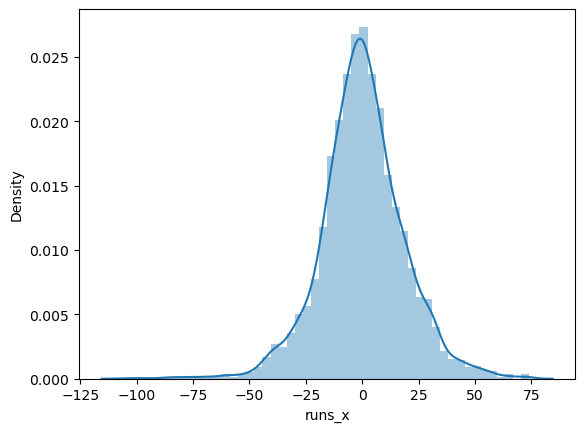

In [75]:
sns.distplot(y_test-predict1)

In [76]:
from sklearn.metrics import r2_score
lr_accuracy = r2_score(y_test,predict1)
print(lr_accuracy)

0.6819681470576251


In [77]:
print(f"The Model Accuracy is {lr_accuracy}.")

The Model Accuracy is 0.6819681470576251.


# XGBOOST Regression

In [78]:
from xgboost import XGBRegressor
model2 = XGBRegressor(n_estimators=1000,learning_rate=0.2,max_depth=12,random_state=1)
model2.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=12, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=1, ...)

In [79]:
xgb_pred = model2.predict(x_train)

In [80]:
print('Train RMSE:', np.sqrt(metrics.mean_squared_error(y_train, xgb_pred)))

Train RMSE: 1.5270527154767837


In [81]:
predict2=model2.predict(x_test)

C:\Users\patel\AppData\Local\Temp\ipykernel_22472\4025396619.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predict2)


<Axes: xlabel='runs_x', ylabel='Density'>

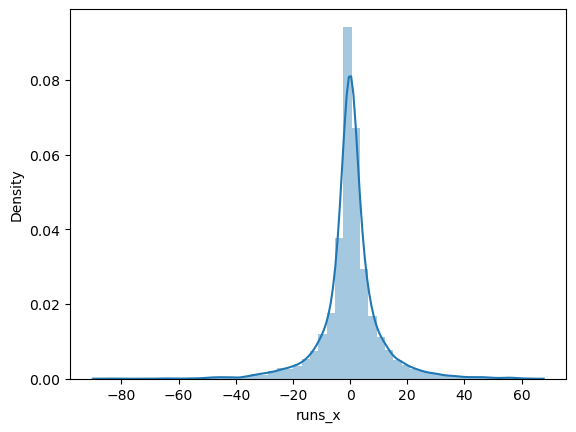

In [82]:
sns.distplot(y_test-predict2)

In [83]:
from sklearn.metrics import r2_score
xgb_accuracy = r2_score(y_test,predict2)
print(f"The Model Accuracy is {xgb_accuracy}.")

The Model Accuracy is 0.8973374519244995.


In [84]:
pickle.dump(pipe,open('pipe.pkl','wb'))

In [85]:
import xgboost
xgboost.__version__

'1.7.5'